# Influence of the filters

Only wavelet filters were used in the previous notebooks, but some finite difference filters are also provided in SiegPy. The goal of this notebook is to compare the results obtained with these other filters to the default results.

## Initialization

The initialization only consists in importing the relevant classes and modules and defining a potential and a particular coordinate mapping.

### Import some modules and classes

In [1]:
from siegpy import (Hamiltonian, SWPotential, ErfKGCoordMap, Gaussian,
                    SWPBasisSet, FD2_filters, FD8_filters)
import numpy as np

### Define a potential

In [2]:
# The potential is read from a file...
siegerts = SWPBasisSet.from_file("siegerts.dat")
pot = siegerts.potential
# ... and then discretized over a grid
l = pot.width
xmax = 7.5
xgrid = np.linspace(-xmax, xmax, 501)
pot.grid = xgrid

### Define a coordinate mapping

In [3]:
theta = 0.6
x0 = 6.0
lbda = 1.5
cm = ErfKGCoordMap(theta, x0, lbda, grid=xgrid)

## Compare the filters

Three family of filters are available within `Siegpy`, presented here by increasing length:

- The finite difference filters of order 2 `FD2_filters`,

- The finite difference filters of order 8 `FD8_filters`,

- The wavelet filters `Sym8_filters` (used as default).

The filter used is defined at the Hamiltonian initialization level:

In [4]:
ham_1 = Hamiltonian(pot, cm, filters=FD2_filters)
ham_2 = Hamiltonian(pot, cm, filters=FD8_filters)
ham_3 = Hamiltonian(pot, cm) # default Sym8_filters

The three hamiltonians are then solved as usual:

In [5]:
basis_1 = ham_1.solve()
basis_2 = ham_2.solve()
basis_3 = ham_3.solve()

The eigenstates can then be compared by plotting the spectrum and the virial expectation value for each state:

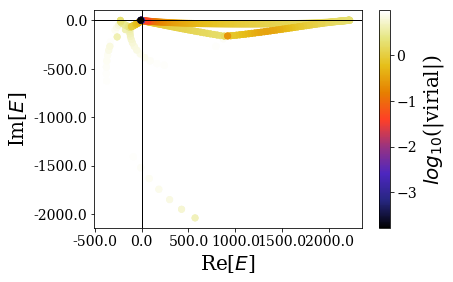

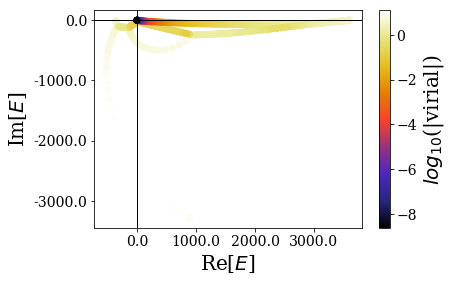

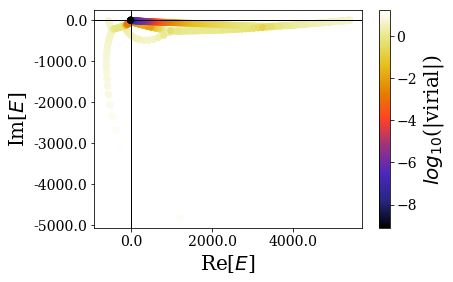

In [6]:
basis_1.plot_energies()
basis_2.plot_energies()
basis_3.plot_energies()

The ranges of the spectra are very different and increase with the length of the filters used. Note that the finite difference filters of order 2 give low virial expectation values compared to the other filters. 

Let us zoom in for a more detailed view on the resonant states found using each filter:

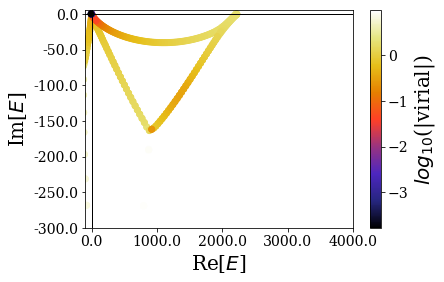

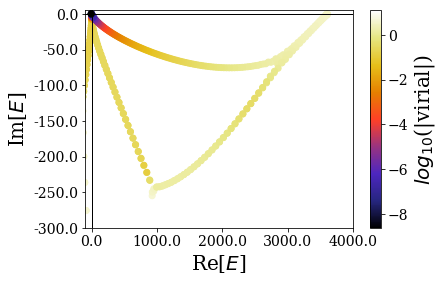

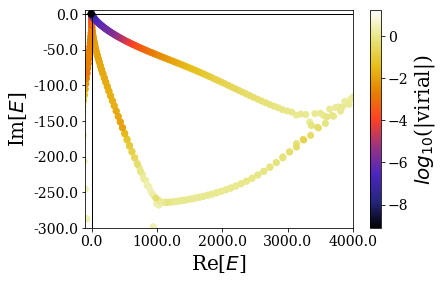

In [7]:
basis_1.plot_energies(xlim=(-100, 4000), ylim=(-300, 5))
basis_2.plot_energies(xlim=(-100, 4000), ylim=(-300, 5))
basis_3.plot_energies(xlim=(-100, 4000), ylim=(-300, 5))

It is not a surprise to witness a larger number of resonant states of low virial when using the largest filters. However, the same bound and resonant states around the 0 energy seem to be found: let us zoom in again to have a clearer view on this part of the spectrum:

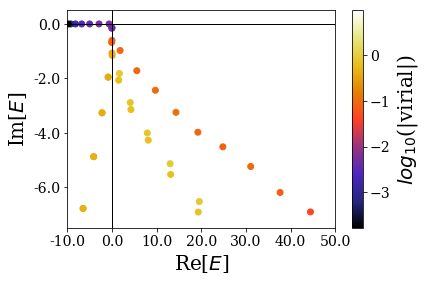

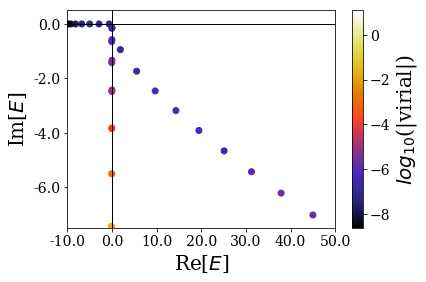

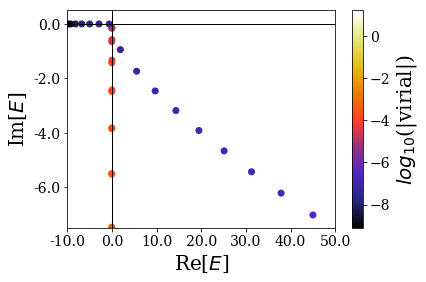

In [8]:
basis_1.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5))
basis_2.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5))
basis_3.plot_energies(xlim=(-10, 50), ylim=(-7.5, 0.5))

It is worth noting that the same bound and resonant states are found using the three filters. The only (important) difference concerns the expectation values of the virial operators, that are not sufficiently low for the resonant states found using both finite difference filters. Still, using the basis set obtained with the finitie difference filters of order 8 allows to get the same results as the default wavelet filters when it comes to study the convergence of the completeness relation:

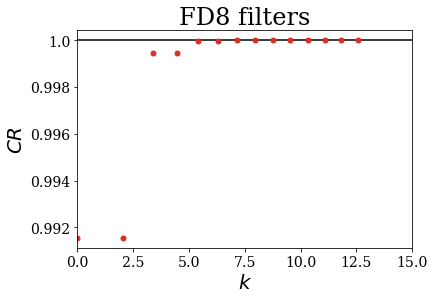

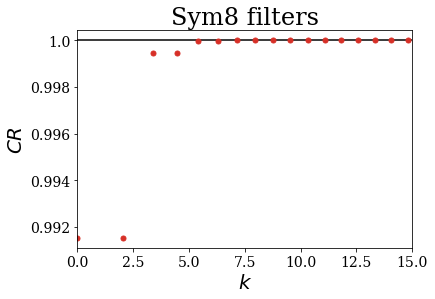

In [9]:
g = Gaussian(l/12, 0, grid=xgrid)
titles = ['FD8 filters', 'Sym8 filters']
for i, basis in enumerate([basis_2, basis_3]):
    basis.max_virial = 10**(-5)
    basis.plot_completeness_convergence(g, xlim=(0, 15), title=titles[i])

The difference is that the resonant states have lower virial expectation values using the wavelet filters, meaning that it is easier to reach higher energy (or equivalently wavenumbers here).

## Conclusion

The quality of the results obtained depends on the family of filters used. The default wavelet family `Sym8_filters` is the best choice, as it makes one able to discriminate more Siegert states from the rest of the numerical eigenstates.